#### Creating EDA Visuals 

In [21]:
# Feature based Employer Recommendation System 

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [173]:
#final_dataframe.csv file has overall rating and subratings added onto the above categorized datset 

In [5]:
df6=pd.read_csv('final_dataframe.csv')

Cleanup of df6 before creating visuals 

In [6]:
#exploring dataset
df6.head()

,Unnamed: 0,Company,Overall,Culture & Values,Work/Life Balance,Sr. Management,Compensation & Benefits,Career Opportunities,$100M_or_Less,$100M_to_1B,...,Employees_5000to10000,Employees_10000+,Goods & Svcs,Finance,Technology,Fashion/Retail,Health,Education,Entertainment,Govnt/Utilities
0,0,J.P. Morgan,3.9,3.8,3.5,3.3,3.8,3.7,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,IBM,3.7,3.7,3.8,3.0,3.1,3.5,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Citi,3.6,3.5,3.3,3.1,3.6,3.4,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Macy's,3.2,3.2,3.1,2.7,2.8,2.9,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,Verizon,3.6,3.4,3.2,2.9,4.2,3.4,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df6.columns

Index(['Unnamed: 0', 'Company', 'Overall', 'Culture & Values',
       'Work/Life Balance', 'Sr. Management', 'Compensation & Benefits',
       'Career Opportunities', '$100M_or_Less', '$100M_to_1B', '$1B_to_10B',
       'More_than_$10B', 'Employees_1to1000', 'Employees_1000to5000',
       'Employees_5000to10000', 'Employees_10000+', 'Goods & Svcs', 'Finance',
       'Technology', 'Fashion/Retail', 'Health', 'Education', 'Entertainment',
       'Govnt/Utilities'],
      dtype='object')

In [8]:
#dropping unnecessary column
df6.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df6.head()

,Company,Overall,Culture & Values,Work/Life Balance,Sr. Management,Compensation & Benefits,Career Opportunities,$100M_or_Less,$100M_to_1B,$1B_to_10B,...,Employees_5000to10000,Employees_10000+,Goods & Svcs,Finance,Technology,Fashion/Retail,Health,Education,Entertainment,Govnt/Utilities
0,J.P. Morgan,3.9,3.8,3.5,3.3,3.8,3.7,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IBM,3.7,3.7,3.8,3.0,3.1,3.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Citi,3.6,3.5,3.3,3.1,3.6,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Macy's,3.2,3.2,3.1,2.7,2.8,2.9,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Verizon,3.6,3.4,3.2,2.9,4.2,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#shouldnt have nulls...
df6.isnull().sum()

Company                    0
Overall                    2
Culture & Values           2
Work/Life Balance          2
Sr. Management             2
Compensation & Benefits    2
Career Opportunities       2
$100M_or_Less              4
$100M_to_1B                4
$1B_to_10B                 4
More_than_$10B             4
Employees_1to1000          4
Employees_1000to5000       4
Employees_5000to10000      4
Employees_10000+           4
Goods & Svcs               4
Finance                    4
Technology                 4
Fashion/Retail             4
Health                     4
Education                  4
Entertainment              4
Govnt/Utilities            4
dtype: int64

In [11]:
df6=df6.fillna(0)

In [12]:
df6.head()

,Company,Overall,Culture & Values,Work/Life Balance,Sr. Management,Compensation & Benefits,Career Opportunities,$100M_or_Less,$100M_to_1B,$1B_to_10B,...,Employees_5000to10000,Employees_10000+,Goods & Svcs,Finance,Technology,Fashion/Retail,Health,Education,Entertainment,Govnt/Utilities
0,J.P. Morgan,3.9,3.8,3.5,3.3,3.8,3.7,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IBM,3.7,3.7,3.8,3.0,3.1,3.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Citi,3.6,3.5,3.3,3.1,3.6,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Macy's,3.2,3.2,3.1,2.7,2.8,2.9,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Verizon,3.6,3.4,3.2,2.9,4.2,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


 EDA SECOND 

In [13]:
df6.head()

,Company,Overall,Culture & Values,Work/Life Balance,Sr. Management,Compensation & Benefits,Career Opportunities,$100M_or_Less,$100M_to_1B,$1B_to_10B,...,Employees_5000to10000,Employees_10000+,Goods & Svcs,Finance,Technology,Fashion/Retail,Health,Education,Entertainment,Govnt/Utilities
0,J.P. Morgan,3.9,3.8,3.5,3.3,3.8,3.7,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IBM,3.7,3.7,3.8,3.0,3.1,3.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Citi,3.6,3.5,3.3,3.1,3.6,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Macy's,3.2,3.2,3.1,2.7,2.8,2.9,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Verizon,3.6,3.4,3.2,2.9,4.2,3.4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df6.columns

Index(['Company', 'Overall', 'Culture & Values', 'Work/Life Balance',
       'Sr. Management', 'Compensation & Benefits', 'Career Opportunities',
       '$100M_or_Less', '$100M_to_1B', '$1B_to_10B', 'More_than_$10B',
       'Employees_1to1000', 'Employees_1000to5000', 'Employees_5000to10000',
       'Employees_10000+', 'Goods & Svcs', 'Finance', 'Technology',
       'Fashion/Retail', 'Health', 'Education', 'Entertainment',
       'Govnt/Utilities'],
      dtype='object')

In [15]:
dfEDA=df6.reset_index()

In [17]:
dfEDA.columns

Index(['index', 'Company', 'Overall', 'Culture & Values', 'Work/Life Balance',
       'Sr. Management', 'Compensation & Benefits', 'Career Opportunities',
       '$100M_or_Less', '$100M_to_1B', '$1B_to_10B', 'More_than_$10B',
       'Employees_1to1000', 'Employees_1000to5000', 'Employees_5000to10000',
       'Employees_10000+', 'Goods & Svcs', 'Finance', 'Technology',
       'Fashion/Retail', 'Health', 'Education', 'Entertainment',
       'Govnt/Utilities'],
      dtype='object')

In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt

#### Making bar graph for Industry Category 

In [49]:
#1
dfEDA['Goods & Svcs'].sum()

160.0

In [35]:
#2
dfEDA['Finance'].sum()

103.0

In [48]:
#3
dfEDA['Technology'].sum()

64.0

In [50]:
#4
dfEDA['Fashion/Retail'].sum()

47.0

In [51]:
#5
dfEDA['Health'].sum()

45.0

In [52]:
#6 
dfEDA['Education'].sum()

32.0

In [54]:
#7
dfEDA['Entertainment'].sum()

28.0

In [53]:
#8
dfEDA['Govnt/Utilities'].sum()

19.0

In [55]:
col_names =  ['Goods & Svcs', 'Finance', 'Technology','Fashion/Retail','Health','Education','Entertainment','Govnt/Utilities']
my_df  = pd.DataFrame(columns = col_names)
my_df

my_df.loc[len(my_df)] = [160,103,64,47,45,32,28,19]

In [57]:
my_df_stacked= my_df.stack()

In [60]:
df_stack= pd.DataFrame(my_df_stacked)

In [61]:
df_stack.head()

0
0 Goods & Svcs    160
  Finance         103
  Technology       64
  Fashion/Retail   47
  Health           45

In [63]:
df_stack.columns

RangeIndex(start=0, stop=1, step=1)

In [65]:
df_stack.columns = ['Name']

In [67]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (0, Goods & Svcs) to (0, Govnt/Utilities)
Data columns (total 1 columns):
Name    8 non-null object
dtypes: object(1)
memory usage: 184.0+ bytes


In [68]:
df_stack['Name'].astype('int32').dtypes

dtype('int32')

In [70]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, (0, Goods & Svcs) to (0, Govnt/Utilities)
Data columns (total 1 columns):
Name    8 non-null object
dtypes: object(1)
memory usage: 184.0+ bytes


In [82]:
df_stack2=df_stack.reset_index()

In [79]:
df_stack2.columns

Index(['level_0', 'level_1', 'Name'], dtype='object')

In [75]:
df_stack2.head()

,level_0,level_1,Name
0,0,Goods & Svcs,160
1,0,Finance,103
2,0,Technology,64
3,0,Fashion/Retail,47
4,0,Health,45


In [83]:
df_stack2 = df_stack.rename(columns={'level_1': 'Name2', 'Name': 'Count'})


In [84]:
df_stack2.head()

Count
0 Goods & Svcs     160
  Finance          103
  Technology        64
  Fashion/Retail    47
  Health            45

In [85]:
df_stack3=df_stack2.reset_index()

In [86]:
df_stack3.head()

,level_0,level_1,Count
0,0,Goods & Svcs,160
1,0,Finance,103
2,0,Technology,64
3,0,Fashion/Retail,47
4,0,Health,45


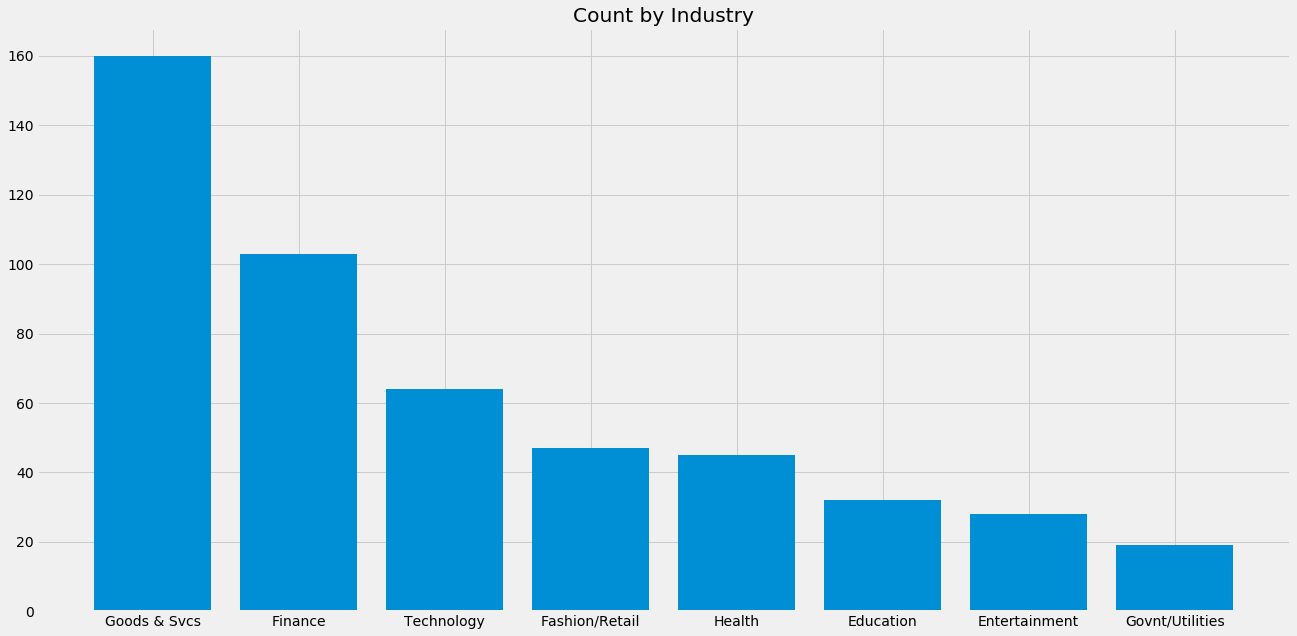

<Figure size 432x288 with 0 Axes>

In [93]:
# Create bars
plt.figure(figsize=(20,10))
plt.title('Count by Industry')
plt.bar(df_stack3['level_1'], df_stack3['Count'])
# Show graphic
plt.show()
plt.savefig('Count_by_Industry.png')

#### Creating distribution visual of overall rating category  

In [ ]:
df

In [ ]:
#Add a new record to a dataframe 
my_df.loc[len(my_df)] = [, 4, 5]

In [33]:
len(dfEDA['Finance'])

502

In [42]:
plt.style.use('fivethirtyeight')

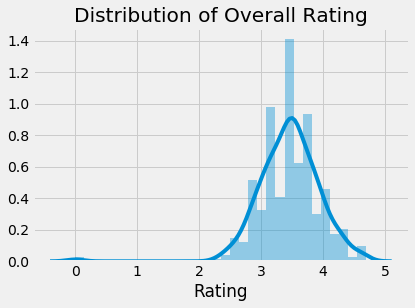

In [96]:
plt.title('Distribution of Overall Rating')
sns.distplot( dfEDA["Overall"] )
plt.xlabel('Rating')
plt.savefig('Overall_Distribution.png')